In [1]:
!pip install numpy
!pip install scikit-learn
!pip install qiskit_machine_learning
!pip install pillow
!pip install kagglehub
!pip install monai
!pip install matplotlib
!pip install torch
!pip install qiskit
!pip install pylatexenc
!pip install torchvision
!pip install ipywidgets
!pip install opencv-python
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 76.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 29.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=e829e893f2205a480934b571388bf27f6d53633b3075a6754e83fc5786ee204f
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [2]:
import os
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from monai.transforms import ScaleIntensity
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from qiskit.circuit import QuantumCircuit
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
import torch
from torch import nn
import torch.optim as optim 
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

import warnings
warnings.filterwarnings("ignore")

In [3]:
'''path = kagglehub.dataset_download(r"navoneel/brain-mri-images-for-brain-tumor-detection")
print("Path to dataset files:", path)'''

Path to dataset files: /kaggle/input/brain-mri-images-for-brain-tumor-detection


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Epoch 1/10, Loss: 8.6173, Accuracy: 65.35%
Epoch 2/10, Loss: 7.3938, Accuracy: 71.29%
Epoch 3/10, Loss: 6.2048, Accuracy: 76.24%
Epoch 4/10, Loss: 3.0771, Accuracy: 92.57%
Epoch 5/10, Loss: 3.2550, Accuracy: 88.12%
Epoch 6/10, Loss: 1.3587, Accuracy: 97.03%
Epoch 7/10, Loss: 1.2883, Accuracy: 96.53%
Epoch 8/10, Loss: 1.5018, Accuracy: 95.54%
Epoch 9/10, Loss: 0.9367, Accuracy: 98.02%
Epoch 10/10, Loss: 0.7674, Accuracy: 99.01%

🔹 Classification Report:
               precision    recall  f1-score   support

    No Tumor       0.81      0.85      0.83        20
       Tumor       0.90      0.87      0.89        31

    accuracy                           0.86        51
   macro avg       0.85      0.86      0.86        51
weighted avg       0.86      0.86      0.86        51



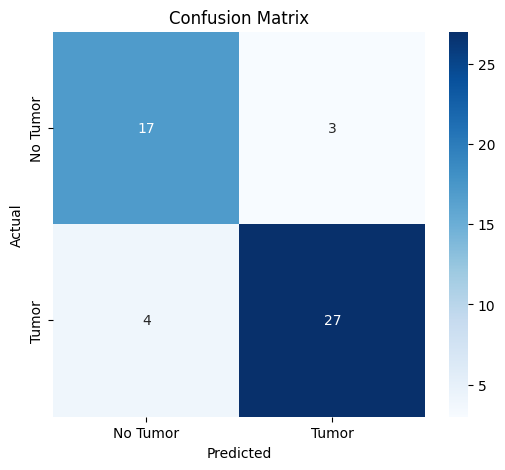

Enter image path:  /kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y1.jpg



🔹 Prediction: Tumor


In [4]:
# ✅ Install required libraries
!pip install qiskit qiskit-machine-learning torch torchvision timm numpy matplotlib scikit-learn pillow

# ✅ Import required libraries
import os
import glob
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import timm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# ✅ Load dataset
dataset_path = "/kaggle/input/brain-mri-images-for-brain-tumor-detection"
tumor_path = os.path.join(dataset_path, "yes")
no_tumor_path = os.path.join(dataset_path, "no")
class_labels = {0: "No Tumor", 1: "Tumor"}

def load_images(folder, label, target_size=(224, 224)):
    data, labels = [], []
    for img_path in glob.glob(os.path.join(folder, "*")):
        try:
            img = Image.open(img_path).convert("RGB").resize(target_size)
            data.append(np.array(img))
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    return np.array(data), np.array(labels)

tumor_data, tumor_labels = load_images(tumor_path, label=1)
no_tumor_data, no_tumor_labels = load_images(no_tumor_path, label=0)
X = np.concatenate([tumor_data, no_tumor_data], axis=0) / 255.0
y = np.concatenate([tumor_labels, no_tumor_labels], axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_train, y_test = np.eye(2)[y_train], np.eye(2)[y_test]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

batch_size = 16
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)

# ✅ Quantum Neural Network (QNN)
def create_qnn():
    num_qubits = 4
    ansatz = RealAmplitudes(num_qubits, reps=2)
    qc = QuantumCircuit(num_qubits)
    qc.compose(ansatz, inplace=True)
    qnn = EstimatorQNN(circuit=qc, input_params=[], weight_params=ansatz.parameters, input_gradients=True)
    return qnn

# ✅ Define Q-ViT Model
class QViT(nn.Module):
    def __init__(self, quantum_layer):
        super(QViT, self).__init__()
        self.vit = timm.create_model("vit_base_patch16_224", pretrained=True)
        self.vit.head = nn.Identity()
        self.quantum_layer = quantum_layer
        self.fc1 = nn.Linear(768 + quantum_layer.neural_network.output_shape[0], 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 2)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.vit(x)
        quantum_input = torch.rand(x.size(0), self.quantum_layer.neural_network.num_inputs).to(x.device)
        quantum_out = self.quantum_layer(quantum_input)
        x = torch.cat((x, quantum_out), dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# ✅ Train the model
qnn = create_qnn()
quantum_layer = TorchConnector(qnn)
qvit_model = QViT(quantum_layer).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(qvit_model.parameters(), lr=0.0001)

def train_model(model, train_loader, test_loader, epochs=10):
    for epoch in range(epochs):
        model.train()
        total_loss, correct_train = 0, 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, torch.argmax(y_batch, dim=1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            correct_train += (torch.argmax(outputs, dim=1) == torch.argmax(y_batch, dim=1)).sum().item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {correct_train / len(train_loader.dataset) * 100:.2f}%")

train_model(qvit_model, train_loader, test_loader, epochs=10)
torch.save(qvit_model.state_dict(), "qvit_model.pth")

# ✅ Evaluate Model
qvit_model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = qvit_model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        y_pred.extend(preds)
        y_true.extend(torch.argmax(y_batch, dim=1).cpu().numpy())

# ✅ Display Classification Report
print("\n🔹 Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels.values()))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Make Predictions
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB").resize((224, 224))
    image = np.array(image) / 255.0
    image_tensor = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
    with torch.no_grad():
        output = qvit_model(image_tensor)
        predicted_class = torch.argmax(output, dim=1).item()
    print(f"\n🔹 Prediction: {class_labels[predicted_class]}")

# ✅ Test on a single image
image_path = input("Enter image path: ")
predict_image(image_path)


<ipython-input-5-c60a493ebf01>:68: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(circuit=qc, input_params=[], weight_params=ansatz.parameters, input_gradients=True)


Epoch 1/10 | Train Loss: 0.6800, Train Accuracy: 57.43% | Test Loss: 0.6569, Test Accuracy: 60.78%
Epoch 2/10 | Train Loss: 0.6406, Train Accuracy: 63.37% | Test Loss: 0.6222, Test Accuracy: 80.39%
Epoch 3/10 | Train Loss: 0.4394, Train Accuracy: 81.19% | Test Loss: 0.3769, Test Accuracy: 88.24%
Epoch 4/10 | Train Loss: 0.2802, Train Accuracy: 89.60% | Test Loss: 0.3635, Test Accuracy: 88.24%
Epoch 5/10 | Train Loss: 0.2523, Train Accuracy: 93.07% | Test Loss: 0.1855, Test Accuracy: 90.20%
Epoch 6/10 | Train Loss: 0.2141, Train Accuracy: 92.08% | Test Loss: 0.4636, Test Accuracy: 80.39%
Epoch 7/10 | Train Loss: 0.2831, Train Accuracy: 90.10% | Test Loss: 0.1797, Test Accuracy: 94.12%
Epoch 8/10 | Train Loss: 0.1821, Train Accuracy: 94.06% | Test Loss: 0.8744, Test Accuracy: 72.55%
Epoch 9/10 | Train Loss: 0.3364, Train Accuracy: 87.13% | Test Loss: 0.3610, Test Accuracy: 88.24%
Epoch 10/10 | Train Loss: 0.1236, Train Accuracy: 96.04% | Test Loss: 0.2155, Test Accuracy: 94.12%

🔹 Classi

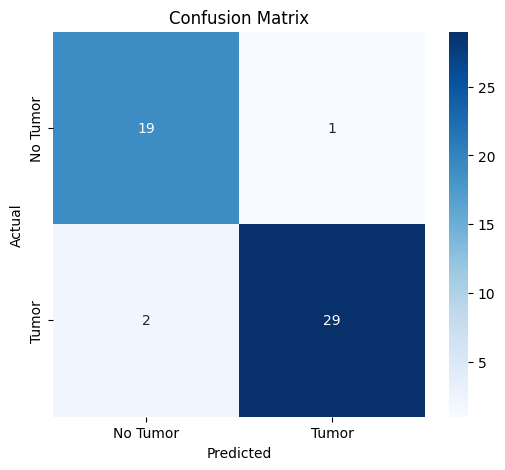

Enter image path:  /kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y1.jpg



🔹 Prediction: Tumor


In [5]:
# ✅ Install required libraries
!pip install qiskit qiskit-machine-learning torch torchvision timm numpy matplotlib scikit-learn pillow

# ✅ Import required libraries
import os
import glob
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import timm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# ✅ Load dataset
dataset_path = "/kaggle/input/brain-mri-images-for-brain-tumor-detection"
tumor_path = os.path.join(dataset_path, "yes")
no_tumor_path = os.path.join(dataset_path, "no")
class_labels = {0: "No Tumor", 1: "Tumor"}

def load_images(folder, label, target_size=(224, 224)):
    data, labels = [], []
    for img_path in glob.glob(os.path.join(folder, "*")):
        try:
            img = Image.open(img_path).convert("RGB").resize(target_size)
            data.append(np.array(img))
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    return np.array(data), np.array(labels)

tumor_data, tumor_labels = load_images(tumor_path, label=1)
no_tumor_data, no_tumor_labels = load_images(no_tumor_path, label=0)
X = np.concatenate([tumor_data, no_tumor_data], axis=0) / 255.0
y = np.concatenate([tumor_labels, no_tumor_labels], axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_train, y_test = np.eye(2)[y_train], np.eye(2)[y_test]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

batch_size = 16
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)

# ✅ Quantum Neural Network (QNN)
def create_qnn():
    num_qubits = 4
    ansatz = RealAmplitudes(num_qubits, reps=2)
    qc = QuantumCircuit(num_qubits)
    qc.compose(ansatz, inplace=True)
    qnn = EstimatorQNN(circuit=qc, input_params=[], weight_params=ansatz.parameters, input_gradients=True)
    return qnn

# ✅ Define Q-ViT Model
class QViT(nn.Module):
    def __init__(self, quantum_layer):
        super(QViT, self).__init__()
        self.vit = timm.create_model("vit_base_patch16_224", pretrained=True)
        self.vit.head = nn.Identity()
        self.quantum_layer = quantum_layer
        self.fc1 = nn.Linear(768 + quantum_layer.neural_network.output_shape[0], 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 2)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.vit(x)
        quantum_input = torch.rand(x.size(0), self.quantum_layer.neural_network.num_inputs).to(x.device)
        quantum_out = self.quantum_layer(quantum_input)
        x = torch.cat((x, quantum_out), dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# ✅ Train the model
qnn = create_qnn()
quantum_layer = TorchConnector(qnn)
qvit_model = QViT(quantum_layer).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(qvit_model.parameters(), lr=0.0001)

def train_model(model, train_loader, test_loader, epochs=10):
    for epoch in range(epochs):
        # Training phase
        model.train()
        total_train_loss, correct_train = 0, 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, torch.argmax(y_batch, dim=1))
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
            correct_train += (torch.argmax(outputs, dim=1) == torch.argmax(y_batch, dim=1)).sum().item()
        
        train_loss = total_train_loss / len(train_loader)
        train_accuracy = correct_train / len(train_loader.dataset) * 100

        # Testing phase
        model.eval()
        total_test_loss, correct_test = 0, 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, torch.argmax(y_batch, dim=1))
                total_test_loss += loss.item()
                correct_test += (torch.argmax(outputs, dim=1) == torch.argmax(y_batch, dim=1)).sum().item()
        
        test_loss = total_test_loss / len(test_loader)
        test_accuracy = correct_test / len(test_loader.dataset) * 100

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}% | Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

train_model(qvit_model, train_loader, test_loader, epochs=10)
torch.save(qvit_model.state_dict(), "qvit_model.pth")

# ✅ Evaluate Model
qvit_model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = qvit_model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        y_pred.extend(preds)
        y_true.extend(torch.argmax(y_batch, dim=1).cpu().numpy())

# ✅ Display Classification Report
print("\n🔹 Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels.values()))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Make Predictions
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB").resize((224, 224))
    image = np.array(image) / 255.0
    image_tensor = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
    with torch.no_grad():
        output = qvit_model(image_tensor)
        predicted_class = torch.argmax(output, dim=1).item()
    print(f"\n🔹 Prediction: {class_labels[predicted_class]}")

# ✅ Test on a single image
image_path = input("Enter image path: ")
predict_image(image_path)


In [6]:

# ✅ Load the trained model
qnn = create_qnn()
quantum_layer = TorchConnector(qnn)
model = QViT(quantum_layer).to(device)

# ✅ Load saved model weights
model.load_state_dict(torch.load("qvit_model.pth", map_location=device))
model.eval()


<ipython-input-5-c60a493ebf01>:68: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(circuit=qc, input_params=[], weight_params=ansatz.parameters, input_gradients=True)
<ipython-input-6-f4d1696e2a14>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by th

QViT(
  (vit): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (patch_drop): Identity()
    (norm_pre): Identity()
    (blocks): Sequential(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (q_norm): Identity()
          (k_norm): Identity()
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): Identity()
        (drop_path1): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU(approximate='none')
         

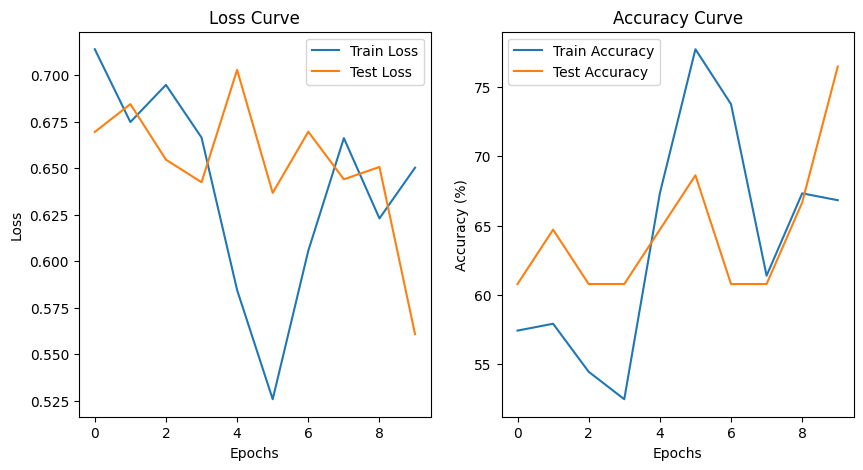

In [7]:
# ✅ Plot Metrics
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label="Train Accuracy")
plt.plot(test_accs, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Curve")
plt.legend()

plt.show()

In [ ]:
#FINAL CODE

<ipython-input-11-48600feb901f>:68: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(circuit=qc, input_params=[], weight_params=ansatz.parameters, input_gradients=True)


Epoch 1/12 | Train Loss: 0.6540, Train Accuracy: 59.41% | Test Loss: 0.6295, Test Accuracy: 72.55%
Epoch 2/12 | Train Loss: 0.3823, Train Accuracy: 84.65% | Test Loss: 0.3280, Test Accuracy: 94.12%
Epoch 3/12 | Train Loss: 0.2393, Train Accuracy: 90.59% | Test Loss: 0.1897, Test Accuracy: 94.12%
Epoch 4/12 | Train Loss: 0.2299, Train Accuracy: 93.07% | Test Loss: 0.2754, Test Accuracy: 90.20%
Epoch 5/12 | Train Loss: 0.1348, Train Accuracy: 96.04% | Test Loss: 0.9195, Test Accuracy: 86.27%
Epoch 6/12 | Train Loss: 0.1137, Train Accuracy: 97.52% | Test Loss: 0.5207, Test Accuracy: 86.27%
Epoch 7/12 | Train Loss: 0.0562, Train Accuracy: 99.01% | Test Loss: 0.3839, Test Accuracy: 92.16%
Epoch 8/12 | Train Loss: 0.0547, Train Accuracy: 98.51% | Test Loss: 0.2823, Test Accuracy: 96.08%
Epoch 9/12 | Train Loss: 0.0490, Train Accuracy: 98.02% | Test Loss: 0.5300, Test Accuracy: 90.20%
Epoch 10/12 | Train Loss: 0.1032, Train Accuracy: 96.53% | Test Loss: 0.3527, Test Accuracy: 92.16%
Epoch 11/

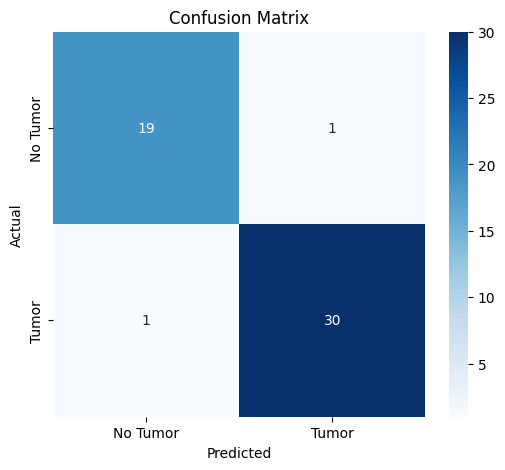

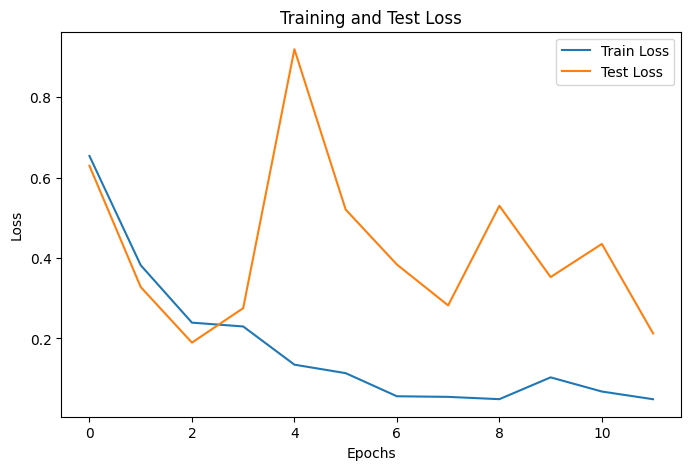

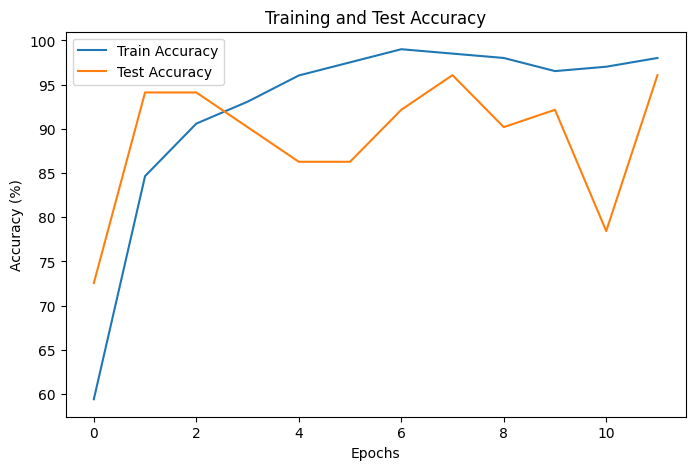

In [11]:
# ✅ Install required libraries
!pip install qiskit qiskit-machine-learning torch torchvision timm numpy matplotlib scikit-learn pillow seaborn

# ✅ Import required libraries
import os
import glob
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import timm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# ✅ Load dataset
dataset_path = "/kaggle/input/brain-mri-images-for-brain-tumor-detection"
tumor_path = os.path.join(dataset_path, "yes")
no_tumor_path = os.path.join(dataset_path, "no")
class_labels = {0: "No Tumor", 1: "Tumor"}

def load_images(folder, label, target_size=(224, 224)):
    data, labels = [], []
    for img_path in glob.glob(os.path.join(folder, "*")):
        try:
            img = Image.open(img_path).convert("RGB").resize(target_size)
            data.append(np.array(img))
            labels.append(label)
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    return np.array(data), np.array(labels)

tumor_data, tumor_labels = load_images(tumor_path, label=1)
no_tumor_data, no_tumor_labels = load_images(no_tumor_path, label=0)
X = np.concatenate([tumor_data, no_tumor_data], axis=0) / 255.0
y = np.concatenate([tumor_labels, no_tumor_labels], axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_train, y_test = np.eye(2)[y_train], np.eye(2)[y_test]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).permute(0, 3, 1, 2).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

batch_size = 16
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)

# ✅ Quantum Neural Network (QNN)
def create_qnn():
    num_qubits = 4
    ansatz = RealAmplitudes(num_qubits, reps=2)
    qc = QuantumCircuit(num_qubits)
    qc.compose(ansatz, inplace=True)
    qnn = EstimatorQNN(circuit=qc, input_params=[], weight_params=ansatz.parameters, input_gradients=True)
    return qnn
    
# ✅ Define Q-ViT Model
class QViT(nn.Module):
    def __init__(self, quantum_layer):
        super(QViT, self).__init__()
        self.vit = timm.create_model("vit_base_patch16_224", pretrained=True)
        self.vit.head = nn.Identity()
        self.quantum_layer = quantum_layer
        self.fc1 = nn.Linear(768 + quantum_layer.neural_network.output_shape[0], 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 2)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.vit(x)
        quantum_input = torch.rand(x.size(0), self.quantum_layer.neural_network.num_inputs).to(x.device)
        quantum_out = self.quantum_layer(quantum_input)
        x = torch.cat((x, quantum_out), dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



# ✅ Train the model
qnn = create_qnn()
quantum_layer = TorchConnector(qnn)
qvit_model = QViT(quantum_layer).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(qvit_model.parameters(), lr=0.0001)

train_losses, test_losses, train_accuracies, test_accuracies = [], [], [], []

def train_model(model, train_loader, test_loader, epochs=12):
    for epoch in range(epochs):
        # Training phase
        model.train()
        total_train_loss, correct_train = 0, 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, torch.argmax(y_batch, dim=1))
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
            correct_train += (torch.argmax(outputs, dim=1) == torch.argmax(y_batch, dim=1)).sum().item()
        
        train_loss = total_train_loss / len(train_loader)
        train_accuracy = correct_train / len(train_loader.dataset) * 100
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Testing phase
        model.eval()
        total_test_loss, correct_test = 0, 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, torch.argmax(y_batch, dim=1))
                total_test_loss += loss.item()
                correct_test += (torch.argmax(outputs, dim=1) == torch.argmax(y_batch, dim=1)).sum().item()
        
        test_loss = total_test_loss / len(test_loader)
        test_accuracy = correct_test / len(test_loader.dataset) * 100
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}% | Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

train_model(qvit_model, train_loader, test_loader, epochs=12)

# ✅ Save the Model
torch.save(qvit_model.state_dict(), "qvit_model.pth")

# ✅ Evaluate Model
qvit_model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = qvit_model(X_batch)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        y_pred.extend(preds)
        y_true.extend(torch.argmax(y_batch, dim=1).cpu().numpy())

# ✅ Display Classification Report
print("\n🔹 Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels.values()))

# ✅ Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Training and Testing Loss Plot
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Test Loss")
plt.legend()
plt.show()

# ✅ Training and Testing Accuracy Plot
plt.figure(figsize=(8, 5))
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training and Test Accuracy")
plt.legend()
plt.show()


In [12]:
import torch
import timm
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from PIL import Image
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# ✅ Define class labels
class_labels = {0: "No Tumor", 1: "Tumor"}

# ✅ Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Quantum Neural Network (QNN) function
def create_qnn():
    num_qubits = 4
    ansatz = RealAmplitudes(num_qubits, reps=2)
    qc = QuantumCircuit(num_qubits)
    qc.compose(ansatz, inplace=True)
    qnn = EstimatorQNN(circuit=qc, input_params=[], weight_params=ansatz.parameters, input_gradients=True)
    return qnn

# ✅ Define Q-ViT Model
class QViT(nn.Module):
    def __init__(self, quantum_layer):
        super(QViT, self).__init__()
        self.vit = timm.create_model("vit_base_patch16_224", pretrained=True)
        self.vit.head = nn.Identity()
        self.quantum_layer = quantum_layer
        self.fc1 = nn.Linear(768 + quantum_layer.neural_network.output_shape[0], 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 2)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.vit(x)
        quantum_input = torch.rand(x.size(0), self.quantum_layer.neural_network.num_inputs).to(x.device)
        quantum_out = self.quantum_layer(quantum_input)
        x = torch.cat((x, quantum_out), dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# ✅ Load the saved model
qnn = create_qnn()
quantum_layer = TorchConnector(qnn)
model = QViT(quantum_layer).to(device)
model.load_state_dict(torch.load("qvit_model.pth", map_location=device))
model.eval()

# ✅ Function to predict an image
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB").resize((224, 224))
    image = np.array(image) / 255.0
    image_tensor = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device)
    
    with torch.no_grad():
        output = model(image_tensor)
        predicted_class = torch.argmax(output, dim=1).item()
    
    print(f"\n🔹 Prediction: {class_labels[predicted_class]}")

# ✅ Driver code
if __name__ == "__main__":
    image_path = input("Enter image path: ")
    predict_image(image_path)


<ipython-input-12-980fdced1acc>:24: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(circuit=qc, input_params=[], weight_params=ansatz.parameters, input_gradients=True)
<ipython-input-12-980fdced1acc>:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by

Enter image path:  /kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y1.jpg



🔹 Prediction: Tumor
